In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("chats.txt", header=None, on_bad_lines='skip', encoding='utf8')
#df = pd.read_csv("mabel.txt",header=None,error_bad_lines=False,encoding='utf8')
df

,0,1
0,27/02/24,10:59 am - Jude Jebaseelan.R -March 2024: htt...
1,27/02/24,12:05 pm - Vijai R: ✅ Assignment marked off y...
2,29/02/24,3:19 pm - Vijai R: ?
3,29/02/24,3:19 pm - Jude Jebaseelan.R -March 2024: WAIT...
4,29/02/24,3:21 pm - Jude Jebaseelan.R -March 2024: i wi...
...,...,...
170,16/04/24,10:56 am - Jude Jebaseelan.R -March 2024: pip...
171,16/04/24,10:57 am - Jude Jebaseelan.R -March 2024: okk...
172,16/04/24,11:37 am - Jude Jebaseelan.R -March 2024: bro...
173,16/04/24,11:43 am - Vijai R: Ok bro


In [3]:
df=df.drop(0)
df.columns=['Date','Chat']
Message=df["Chat"].str.split("-",n=1,expand=True)
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]
df

,Date,Time,Name,Chat
1,27/02/24,12:05 pm,Vijai R,✅ Assignment marked off your list! Your persi...
2,29/02/24,3:19 pm,Vijai R,?
3,29/02/24,3:19 pm,Jude Jebaseelan.R -March 2024,WAIT BRO
4,29/02/24,3:21 pm,Jude Jebaseelan.R -March 2024,i will explain in the evening
5,29/02/24,7:09 pm,Jude Jebaseelan.R -March 2024,perplexity
...,...,...,...,...
170,16/04/24,10:56 am,Jude Jebaseelan.R -March 2024,pip install dlib mattum pottu pathan
171,16/04/24,10:57 am,Jude Jebaseelan.R -March 2024,okk bro I try
172,16/04/24,11:37 am,Jude Jebaseelan.R -March 2024,bro python 3.10 install panna ok thana
173,16/04/24,11:43 am,Vijai R,Ok bro


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 1 to 174
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    174 non-null    object
 1   Time    174 non-null    object
 2   Name    174 non-null    object
 3   Chat    174 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [5]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

dataset=df
dataset.dropna(inplace=True)

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


In [6]:
senti=sid.polarity_scores(dataset['Chat'][4])

In [7]:
senti

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [8]:
 def sentimentalAnalysis(data,columnname):
        
        #downloading vader_lexicon for the process
        import matplotlib.pyplot as plt
        import seaborn as sns
        "Importing Necessary Packeage"
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        "Deleting null pr empty value"
        data.dropna(inplace=True)
        
        "Checking for a comment"
        #sid.polarity_scores(data[columnname][93])
        
        "Creating respective columns"
        
        data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
        data['Negtive']  = data['scores'].apply(lambda score_dict: score_dict['neg'])
        data['Postive']  = data['scores'].apply(lambda score_dict: score_dict['pos'])
        data['Neutral']  = data['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        #comp=sns.countplot(x = 'comp_score', hue = 'Name', data = data, palette = 'magma')
        #comp.figure.savefig("date_charts.png")
        "Checking how many pos and neg"
        posneg=pd.DataFrame(data['comp_score'].value_counts())
        return posneg,data

In [9]:
pos,data_Senti=sentimentalAnalysis(dataset,columnname='Chat')

<Figure size 640x480 with 0 Axes>

In [10]:
data_Senti

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,27/02/24,12:05 pm,Vijai R,✅ Assignment marked off your list! Your persi...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4926,0.0,0.242,0.758,pos
2,29/02/24,3:19 pm,Vijai R,?,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000,pos
3,29/02/24,3:19 pm,Jude Jebaseelan.R -March 2024,WAIT BRO,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
4,29/02/24,3:21 pm,Jude Jebaseelan.R -March 2024,i will explain in the evening,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
5,29/02/24,7:09 pm,Jude Jebaseelan.R -March 2024,perplexity,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
...,...,...,...,...,...,...,...,...,...,...
170,16/04/24,10:56 am,Jude Jebaseelan.R -March 2024,pip install dlib mattum pottu pathan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
171,16/04/24,10:57 am,Jude Jebaseelan.R -March 2024,okk bro I try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos
172,16/04/24,11:37 am,Jude Jebaseelan.R -March 2024,bro python 3.10 install panna ok thana,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,0.0,0.268,0.732,pos
173,16/04/24,11:43 am,Vijai R,Ok bro,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.0,0.688,0.312,pos


In [11]:
pos

,count
comp_score,
pos,154
neg,20


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
dtm=tfidf.fit_transform(df["Chat"])    

In [14]:
from sklearn.decomposition import NMF
nmf_model=NMF(n_components=5,random_state=42)
nmf_model.fit(dtm)

NMF(n_components=5, random_state=42)

In [17]:
for index,topic in enumerate(nmf_model.components_):
    results=[tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(results)

['idea', 'kindly', 'night', 'clear', 'im', 'try', 'error', 'network', 'yes', 'bro']
['nu', 'panna', '10', 'install', 'thana', 'python', 'bro', 'request', 'accept', 'ok']
['irrukan', 'la', 'panna', 'path', 'irruku', 'atha', 'itha', 'varuthu', 'error', 'tha']
['hello', 'fast', 'explain', 'error', 'illamae', 'tha', 'irruku', 'bro', 'try', 'okk']
['spyder', 'pannanum', 'yena', 'ithula', 'la', 'pathuittan', 'illamae', 'bro', 'learning', 'hello']


In [19]:
topic_results=nmf_model.transform(dtm)
df["Topic"]=topic_results.argmax(axis=1)
df

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
1,27/02/24,12:05 pm,Vijai R,✅ Assignment marked off your list! Your persi...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.4926,0.0,0.242,0.758,pos,2
2,29/02/24,3:19 pm,Vijai R,?,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000,pos,0
3,29/02/24,3:19 pm,Jude Jebaseelan.R -March 2024,WAIT BRO,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
4,29/02/24,3:21 pm,Jude Jebaseelan.R -March 2024,i will explain in the evening,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,2
5,29/02/24,7:09 pm,Jude Jebaseelan.R -March 2024,perplexity,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,0
...,...,...,...,...,...,...,...,...,...,...,...
170,16/04/24,10:56 am,Jude Jebaseelan.R -March 2024,pip install dlib mattum pottu pathan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,2
171,16/04/24,10:57 am,Jude Jebaseelan.R -March 2024,okk bro I try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,1.000,pos,3
172,16/04/24,11:37 am,Jude Jebaseelan.R -March 2024,bro python 3.10 install panna ok thana,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,0.0,0.268,0.732,pos,1
173,16/04/24,11:43 am,Vijai R,Ok bro,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.0,0.688,0.312,pos,1


In [21]:
df["Topic"].value_counts()

Topic
0    68
2    66
1    18
3    12
4    10
Name: count, dtype: int64

In [27]:
dataset=df
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

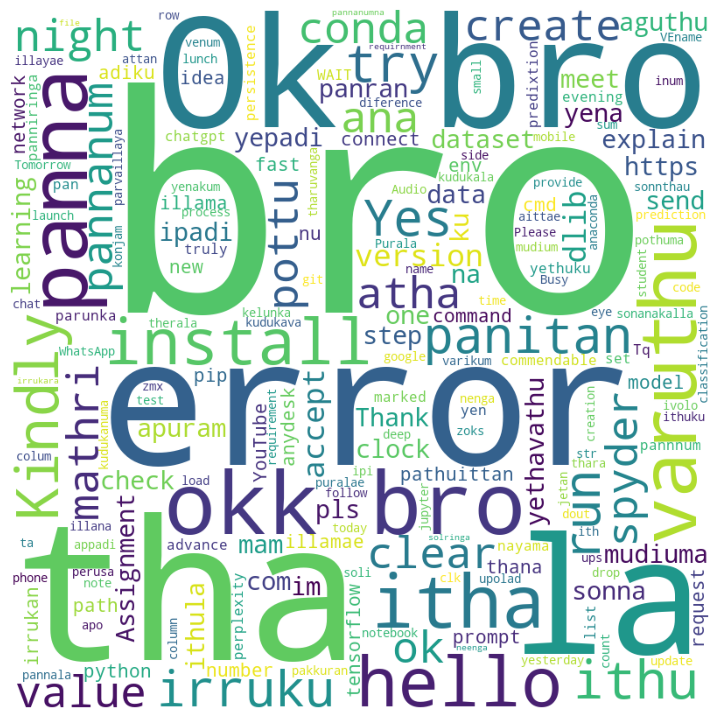

Successfully created word cloud and saved image.


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Define stopwords
stoplist = stopwords.words('english')
stoplist.extend(['omitted', 'voice','missed','call','video','deleted','media','message'])

# Initialize list for comment words
comment_words = []

# Reset the index of the dataset
dataset.index = range(dataset.shape[0])

# Iterate through the chat column and add words to comment_words if not empty or stopwords
for i in range(len(dataset)):
    chat_message = dataset['Chat'][i]
    if isinstance(chat_message, str) and chat_message.strip():  # Check if not empty
        comment_words.append(chat_message)

# Join the comment words into one large string
vv = " ".join(comment_words)

# Check if there's valid text to generate a word cloud
if vv.strip():  # Ensure there's actual content
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white', 
                          stopwords=stoplist, 
                          min_font_size=10).generate(vv)

    # Plotting the wordcloud
    plt.figure(figsize=(9, 7), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Save the wordcloud image
    plt.savefig('wordcloud.PNG')
    plt.show()

    print("Successfully created word cloud and saved image.")
else:
    print("No valid words to generate the word cloud.")
